# How to calculate Zwicker loudness from .wav file (steady signal)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the acoustic loudness (Zwicker method) of a steady signal from a .wav file

In [1]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import math
import numpy as np
import matplotlib.pyplot as plt

# Import MoSQITo modules
from mosqito.generic.wav_to_oct3 import wav_to_oct3
from mosqito.loudness.loudness_zwicker_stationary import loudness_zwicker_stationary

For this tutorial, the test signal n°3 from ISO 532-1 annex B3 is used (1 kHz tone in free field with a level of 60 dB). According to the standard, for the calibration of the WAVE file, 0 dB (relative to full scale) shall correspond to a sound pressure level of 100 dB.

First the .wav file is loaded and converted to third octave band spectrum using the "wav_to_oct3" script. By default, the script calculate 28 third octave levels from 25 Hz to 12500 Hz in dB re. $2.10^{-5}$ Pa. The *calib* input argument is used to convert the .wav data to Pa.

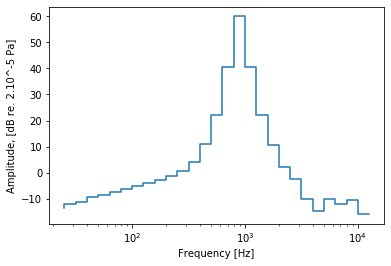

In [2]:
# Load signal and compute third octave band spectrum
spec, freq = wav_to_oct3('../mosqito/tests/data/ISO_532-1/Test signal 3 (1 kHz 60 dB).wav', calib = 2 * 2**0.5)
plt.step(freq, spec)
plt.xscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude, [dB re. 2.10^-5 Pa]")
plt.show()

Finally the script "loudness_zwicker_stationary" is called with the third octave band spectrum and the field type as input parameters. The script calculate the loudness N in sones, the specific loudness N_specific in sones/Bark and the corresponding critical band rate scale bark_axis in Bark.

Loudness = 4.052 sone


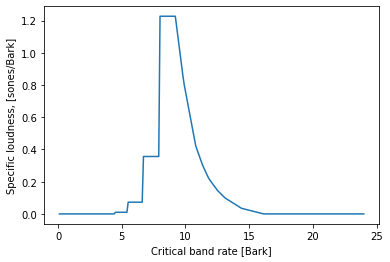

In [3]:
N, N_specific, bark_axis = loudness_zwicker_stationary(spec, field_type="free")
print('Loudness = ' + str(N) + ' sone')
plt.plot(bark_axis, N_specific)
plt.xlabel("Critical band rate [Bark]")
plt.ylabel("Specific loudness, [sones/Bark]")
plt.show()